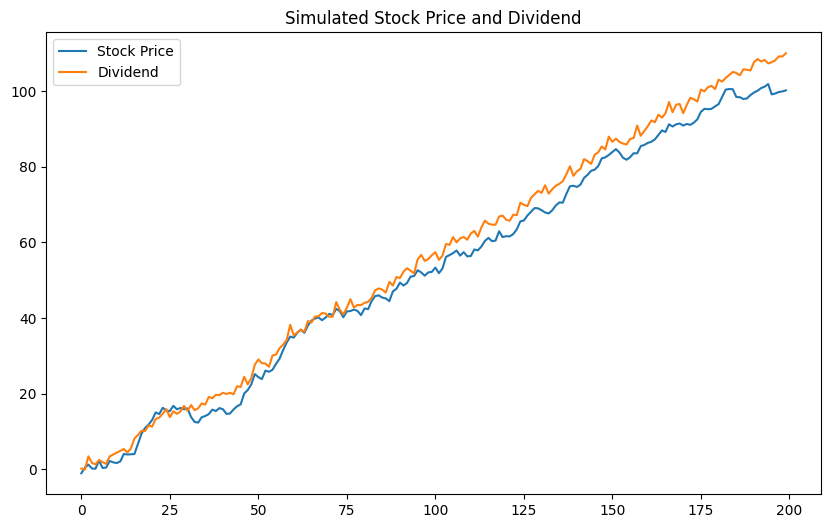

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
# from statsmodels.tsa.vecm.vecm import VECM

# 生成模擬數據
np.random.seed(123)
T = 200
t = np.arange(T)

# 非平穩但協整的序列
S = 0.5 * t + np.cumsum(np.random.randn(T))
D = 0.3 * t + 0.5 * S + np.random.randn(T)

data = pd.DataFrame({'S': S, 'D': D})

# 繪製數據
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Stock Price')
plt.plot(t, D, label='Dividend')
plt.legend()
plt.title('Simulated Stock Price and Dividend')
plt.show()

In [3]:
# 估計VAR模型
model_var = VAR(data)
results_var = model_var.fit(2)  # 使用2階滯後

# 預測
forecast_var = results_var.forecast(data.values[-2:], steps=5)
print("VAR Forecast:\n", forecast_var)

VAR Forecast:
 [[101.1021754  109.89448244]
 [101.89647292 110.35762422]
 [102.63029961 110.60485201]
 [103.30555299 110.99177197]
 [103.93653723 111.35311194]]


In [ ]:
# 估計VECM模型
model_vecm = VECM(data, k_ar_diff=2, deterministic="co")
results_vecm = model_vecm.fit()

# 預測
forecast_vecm = results_vecm.predict(steps=5)
print("VECM Forecast:\n", forecast_vecm)